## Linear Regression Model

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [18]:
#Read the Dataset
Percent = pd.read_csv(r"C:\Users\mahar\OneDrive\Documents\student_scores - student_scores.csv")
Percent

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [19]:
#Check missing values
Percent.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [20]:
#Check Datatypes
Percent.dtypes

Hours     float64
Scores      int64
dtype: object

In [21]:
for i in Percent.columns:
    print(i,":",Percent[i].unique(),"\n")

Hours : [2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 1.9 6.1
 7.4 4.8 3.8 6.9 7.8] 

Scores : [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 24 67 69 54 35 76 86] 



In [22]:
Percent.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


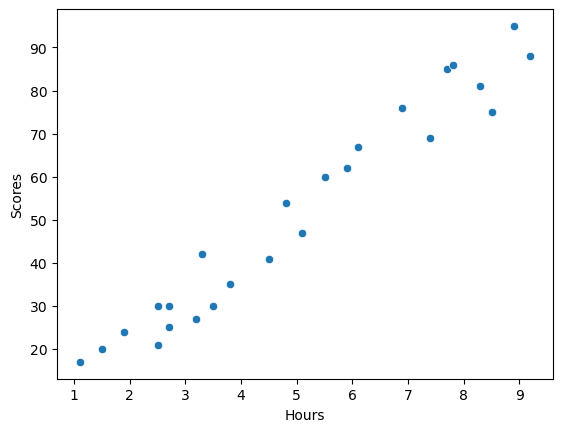

In [23]:
#Plotting the Distribution
sns.scatterplot(x=Percent.Hours, y=Percent.Scores)
plt.show()

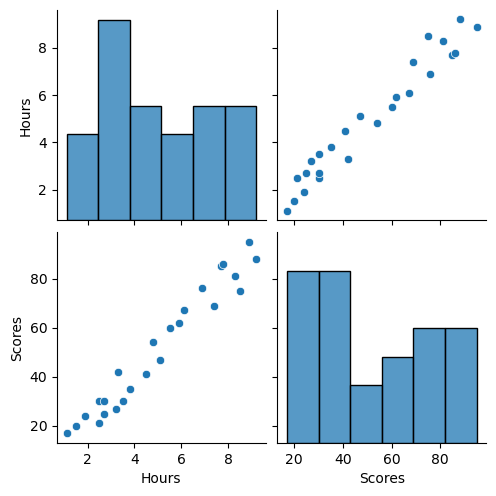

In [24]:
sns.pairplot(Percent)
plt.show()

In [25]:
#Ip/Op Creation
ip = Percent.drop('Scores',axis=1)
op = Percent.Scores

In [26]:
ip.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [27]:
op.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [28]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(ip,op,test_size=0.2)

In [29]:
x_train

,Hours
13,3.3
12,4.5
3,8.5
7,5.5
1,5.1
11,5.9
24,7.8
19,7.4
20,2.7
17,1.9


In [30]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20, 1)
(20,)
(5, 1)
(5,)


In [33]:
#Standard Scalar Transform 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [34]:
x_train

array([[-0.53774011],
       [-0.0215096 ],
       [ 1.69925876],
       [ 0.40868249],
       [ 0.23660565],
       [ 0.58075932],
       [ 1.3981243 ],
       [ 1.22604746],
       [-0.79585537],
       [-1.14000904],
       [-1.48416272],
       [-0.88189379],
       [-0.79585537],
       [-0.88189379],
       [ 0.10754802],
       [-1.31208588],
       [ 1.35510509],
       [ 1.61322034],
       [-0.4517017 ],
       [-0.32264407]])

In [35]:
#Machine Learning Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [36]:
#Prediction
pred = lr.predict(x_test)
pred

array([70.37338096,  9.67240413, 47.10467318, 39.0112096 , 67.33833212])

In [37]:
y_test

6     88
2     27
23    76
18    67
15    95
Name: Scores, dtype: int64

In [38]:
#Accuracy
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(pred, y_test)
r2 = r2_score(pred, y_test)
print("Mean Squared Error: ",mse)
print("R2 Score: ",r2)

Mean Squared Error:  598.8846894033213
R2 Score:  -0.23905784278428044


In [39]:
#Graph for Linear Regression 
df = pd.DataFrame({'Y_Test':list(y_test), 'prediction':pred})
df

,Y_Test,prediction
0,88,70.373381
1,27,9.672404
2,76,47.104673
3,67,39.011210
4,95,67.338332


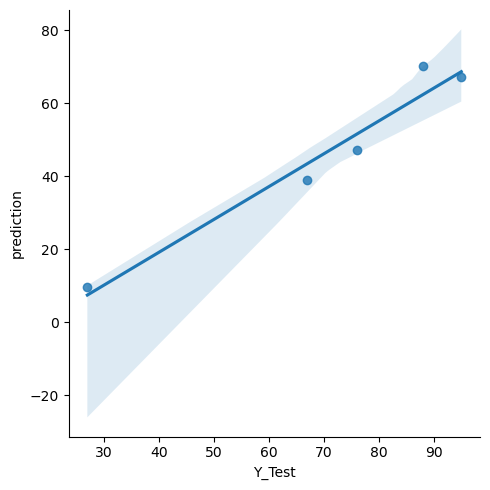

In [40]:
sns.lmplot(x='Y_Test', y='prediction', data=df)
plt.show()